In [19]:
import numpy as np
import pandas as pd 
import sklearn    
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import svm
import pickle

     

In [20]:
df=read_csv("Exp_ProcessPlanner.csv")
xtrain=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytrain=df[['Ra']]

In [21]:
print(xtrain)

    Feed  Speed  DoC  WoC  Dir  Coolant
0   1400   3000  0.5  0.6    1        1
1   2000   4000  0.5  1.0    1        1
2    800   2000  0.5  1.4    0        1
3    200   1000  0.5  0.2    0        1
4    200   2000  1.5  1.0    1        1
5    800   1000  1.5  0.6    1        1
6   2000   3000  1.5  0.2    0        0
7   1400   4000  1.5  1.4    0        1
8    800   4000  2.5  0.2    1        0
9    200   3000  2.5  1.4    1        1
10  1400   1000  2.5  1.0    0        0
11  2000   2000  2.5  0.6    0        1
12  2000   1000  3.5  1.4    1        0
13  1400   2000  3.5  0.2    1        1
14   200   4000  3.5  0.6    0        0
15   800   3000  3.5  1.0    0        1


In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [24]:
xtrain_s = scaler.transform(xtrain)

In [25]:
xtrain_s=np.array(xtrain_s)
ytrain=np.array(ytrain)

In [26]:
df=read_csv("Test_consolidated.csv")
xtest=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytest=df[['Ra']]

In [27]:
scaler1=StandardScaler()
scaler1.fit(xtest)

StandardScaler()

In [28]:
xtest_s=scaler1.transform(xtest)

In [29]:
C_arr = [0.1,1,10,100,1000]
eps_arr = [1,0.1,0.01,0.001,0.0001,0.00001]

In [31]:
hyper_arr = []
hyper_cols =  ['c','epsilon','mae', 'mse']
for C in C_arr:
    for epsilon in eps_arr:
        model = svm.SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(xtrain_s, ytrain)
        yhat = model.predict(xtest_s)
        yhat = yhat.reshape((yhat.shape[0], 1))
        mae = mean_absolute_error(ytest, yhat)
        mse = mean_squared_error(ytest, yhat)

        # corr = stats.pearsonr(Y_test,Y_pred)[0]


        hyper_arr.append([C,epsilon,mae, mse])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['mse'], ascending=True)
hyper_df

C:\Users\SETTI NAVEEN NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SETTI NAVEEN NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SETTI NAVEEN NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SETTI NAVEEN NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

,c,epsilon,mae,mse
6,1.0,1.00000,0.774767,1.009485
3,0.1,0.00100,0.861713,1.168614
4,0.1,0.00010,0.861845,1.168814
5,0.1,0.00001,0.861858,1.168834
2,0.1,0.01000,0.860770,1.169027
1,0.1,0.10000,0.851848,1.180401
7,1.0,0.10000,0.746700,1.188461
8,1.0,0.01000,0.764086,1.208203
9,1.0,0.00100,0.766147,1.210750
10,1.0,0.00010,0.766316,1.210895


In [32]:
# Building SVR model with best parameters

model_svr = svm.SVR(kernel='rbf', C=10, epsilon=0.1) # set kernel and hyperparameters
svr = model_svr.fit(xtrain_s, ytrain)
yhat = model_svr.predict(xtest_s)
yhat = yhat.reshape((yhat.shape[0], 1))
mae = mean_absolute_error(ytest, yhat)
mse = mean_squared_error(ytest, yhat)
print(yhat)
print(ytest)
print(mae)
print(mse)

# print(yhat)
# print(ytest)

[[1.40947452]
 [2.10809384]
 [2.15016731]
 [0.89702555]
 [2.32434606]
 [1.88466225]
 [0.61274559]
 [1.55747114]
 [1.34156187]
 [2.58246795]
 [3.04552061]
 [1.93697241]
 [6.00299618]
 [0.87139905]
 [1.37300787]
 [2.21586918]]
        Ra
0   3.6445
1   2.1120
2   3.6592
3   1.1975
4   3.0381
5   1.6546
6   0.5725
7   1.5943
8   0.9961
9   1.4601
10  1.9601
11  1.2658
12  3.0282
13  1.5527
14  4.4231
15  2.5178
0.9563670201370487
1.8527274756403034


C:\Users\SETTI NAVEEN NAIDU\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


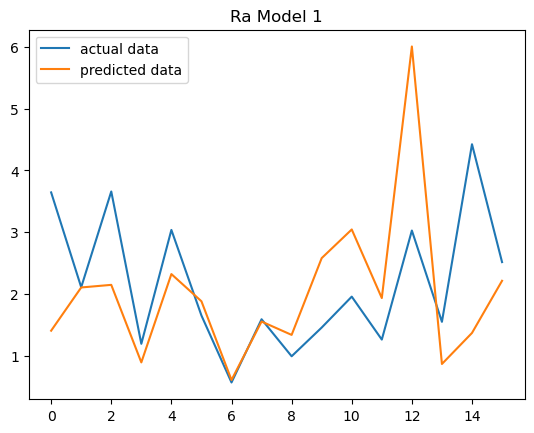

In [33]:
import matplotlib.pyplot as plt

plt.plot(ytest[:], label="actual data")
plt.plot(yhat[:], label="predicted data")
plt.title("Ra Model 1")
plt.legend()
plt.show()

In [34]:
file=open('model.pkl','wb')
pickle.dump(model_svr,file)